# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import preprocessing
from collections import Counter
from pprint import pprint
import numpy as np

In [2]:
mnist_data = pd.read_csv('mnist.csv').values

# Test Image Plotting

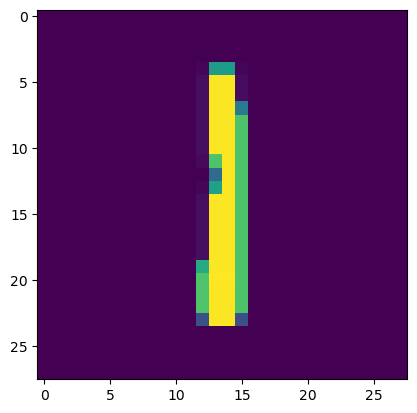

In [3]:
labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28
plt.imshow(digits[2].reshape(img_size, img_size))
plt.show()

# 1. Data Exploration

In [4]:
label_counts = Counter(labels)
label_percentages = {label: count/len(labels) for label, count in label_counts.items()}
pprint(label_counts)
print()
pprint(label_percentages)

Counter({1: 4684,
         7: 4401,
         3: 4351,
         9: 4188,
         2: 4177,
         6: 4137,
         0: 4132,
         4: 4072,
         8: 4063,
         5: 3795})

{0: 0.09838095238095237,
 1: 0.11152380952380953,
 2: 0.09945238095238096,
 3: 0.1035952380952381,
 4: 0.09695238095238096,
 5: 0.09035714285714286,
 6: 0.0985,
 7: 0.10478571428571429,
 8: 0.09673809523809523,
 9: 0.09971428571428571}


In [5]:
from collections import defaultdict

pixel_avg = defaultdict(float)
for i in range(len(digits[0, :])):
    pixel_avg[i] = sum(digits[:, i])/len(digits[:, i])

In [6]:
pprint(pixel_avg)

useless_pixels = [i for i, avg in pixel_avg.items() if avg == 0.0]
print(useless_pixels)
print(len(useless_pixels))

defaultdict(<class 'float'>,
            {0: 0.0,
             1: 0.0,
             2: 0.0,
             3: 0.0,
             4: 0.0,
             5: 0.0,
             6: 0.0,
             7: 0.0,
             8: 0.0,
             9: 0.0,
             10: 0.0,
             11: 0.0,
             12: 0.003,
             13: 0.01119047619047619,
             14: 0.005142857142857143,
             15: 0.00021428571428571427,
             16: 0.0,
             17: 0.0,
             18: 0.0,
             19: 0.0,
             20: 0.0,
             21: 0.0,
             22: 0.0,
             23: 0.0,
             24: 0.0,
             25: 0.0,
             26: 0.0,
             27: 0.0,
             28: 0.0,
             29: 0.0,
             30: 0.0,
             31: 0.0,
             32: 0.00038095238095238096,
             33: 0.0013095238095238095,
             34: 0.010547619047619047,
             35: 0.02726190476190476,
             36: 0.050904761904761904,
             37: 0.0664047

## 2. Ink feature and first model

In [7]:
# create ink feature

ink = np.array([sum(row) for row in digits])

# compute mean for each digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]

# compute standard deviation for each digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

# The reshape is neccesary to call LogisticRegression() with a single feature
ink = scale(ink).reshape(-1, 1)

In [8]:
model_logreg1 = LogisticRegression(random_state =0).fit(ink,labels)

In [9]:
model_logreg1.predict(ink)

array([1, 0, 1, ..., 2, 3, 1])

In [10]:
model_logreg1.score(ink, labels)

0.22680952380952382

# 3. LongestLines Feature and model

In [11]:
def longest_line_ratio(image):
    """Finds the longest lines horizontally and vertically withi n the digit. Takes their lengths and returns
    a ratio of row_length/column_length. High number means row is longer than column, close to 1 means they are
    roughly the same, close to 0, and column is longer than row"""
    # Assuming continuous 784 pixels
    max_row_length = 0
    max_column_length = 0
    
    # ROW CALCULATION
    for i in range(0, 784, 28): #index 0, 28, 56 etc...
        end_of_row = i + 28
        counter = 0
        
        # 0 ... 28
        for current_pixel in range(i, end_of_row):
            if image[current_pixel] > 0:
                counter += 1
        
        max_row_length = max(counter, max_row_length)
    
    # COLUMN CALCULATION
    for i in range(0, 28): #index 0, 1, 2 ... 28
        end_of_column = i + (28 * 27)
        counter = 0
        
        # 0 ... 28
        for current_pixel in range(i, end_of_column, 28):
            if image[current_pixel] > 0:
                counter += 1
        
        max_column_length = max(counter, max_column_length)
        
    return (max_row_length)

In [12]:
ratio = np.array([longest_line_ratio(image) for image in digits])

# compute mean for each digit class
ratio_mean = [np.mean(ratio[labels == i]) for i in range(10)]

# compute standard deviation for each digit class
ratio_std = [np.std(ratio[labels == i]) for i in range(10)]

# The reshape is neccesary to call LogisticRegression() with a single feature
ink = scale(ink).reshape(42000,)
ratio = scale(ratio).reshape(42000,)

In [13]:
print(ratio_mean[0], "\t", ratio_std[0])
print(ratio_mean[1], "\t", ratio_std[1])
print(ratio_mean[2], "\t", ratio_std[2])
print(ratio_mean[3], "\t", ratio_std[3])
print(ratio_mean[4], "\t", ratio_std[4])
print(ratio_mean[5], "\t", ratio_std[5])
print(ratio_mean[6], "\t", ratio_std[6])
print(ratio_mean[7], "\t", ratio_std[7])
print(ratio_mean[8], "\t", ratio_std[8])
print(ratio_mean[9], "\t", ratio_std[9])

14.326234269119071 	 2.63347632089732
5.513663535439795 	 1.7399292719590995
16.265022743595882 	 2.7267909697626904
13.73086646747874 	 2.575802960289505
14.410117878192535 	 2.895490665561919
14.11725955204216 	 2.4770259005669235
13.665216340343244 	 2.7431909520332765
14.697114292206317 	 2.9584432701909633
12.712281565345803 	 2.6358561081855605
12.51313276026743 	 2.3524397351054667


In [14]:
X = np.concatenate((ink,ratio), axis =0)

In [15]:
X = scale(X).reshape(42000,2)

In [16]:
model_logreg2 = LogisticRegression(random_state =0).fit(X,labels)

In [17]:
model_logreg2.predict(X)

array([1, 1, 3, ..., 3, 1, 1])

In [18]:
model_logreg2.score(X, labels)

0.11133333333333334

# 3. MLR and SVM with training


In [19]:
split = 5000/42000
X_train, X_test, y_train, y_test = train_test_split(digits, labels, train_size = split)

In [20]:
min_max_scaler = preprocessing.MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

#model_MLRCV = LogisticRegressionCV(Cs = 10, penalty = 'l1', solver = 'liblinear', n_jobs = 6, random_state = 0, max_iter = 10000).fit(X_train, y_train)

In [21]:
results_MLRCV = model_MLRCV.predict(X_test)
model_MLRCV.score(X_test, y_test)

NameError: name 'model_MLRCV' is not defined

In [22]:
model_MLR = LogisticRegression(penalty = 'l1', solver = 'liblinear', random_state = 0, max_iter = 10000).fit(X_train, y_train)

In [23]:
results_MLR = model_MLR.predict(X_test)
model_MLR.score(X_test, y_test)

0.8916216216216216

In [24]:
%%time
model_SVM = SVC().fit(X_train, y_train)
results_SVM = model_SVM.predict(X_test)
model_SVM.score(X_test, y_test)

CPU times: user 52.4 s, sys: 67.1 ms, total: 52.4 s
Wall time: 52.4 s


0.9467297297297297

In [38]:
clf = GridSearchCV(SVC(), {
    'C': [1, 3, 5, 7, 10],
    'kernel': ['rbf','linear']
    }, cv=5, return_train_score = False)

clf.fit(X_train, y_train)
clf.cv_results_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 3, 5, 7, 10], 'kernel': ['rbf', 'linear']})

In [40]:
clf.cv_results_

{'mean_fit_time': array([1.15147371, 0.63282752, 1.07962017, 0.63198428, 1.08454065,
        0.62791567, 1.08532858, 0.63043303, 1.08056641, 0.62888279]),
 'std_fit_time': array([0.00763738, 0.00941255, 0.00772987, 0.00977538, 0.01303942,
        0.00962966, 0.01588594, 0.01103754, 0.01298279, 0.00992987]),
 'mean_score_time': array([0.59955239, 0.2512661 , 0.57822456, 0.2500423 , 0.58463521,
        0.24887605, 0.58671699, 0.24956613, 0.58326855, 0.24943986]),
 'std_score_time': array([0.00457851, 0.00490582, 0.00363668, 0.0031859 , 0.00523681,
        0.0036441 , 0.00646087, 0.00469922, 0.00416082, 0.00328392]),
 'param_C': masked_array(data=[1, 1, 3, 3, 5, 5, 7, 7, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear',
                    'rbf', 'linear', 'rbf', 'linear'],
         

In [41]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.151474,0.007637,0.599552,0.004579,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.948,0.946,0.954,0.949,0.948,0.9490,0.002683,5
1,0.632828,0.009413,0.251266,0.004906,1,linear,"{'C': 1, 'kernel': 'linear'}",0.900,0.906,0.904,0.919,0.909,0.9076,0.006406,6
2,1.079620,0.007730,0.578225,0.003637,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.956,0.950,0.952,0.952,0.953,0.9526,0.001960,4
3,0.631984,0.009775,0.250042,0.003186,3,linear,"{'C': 3, 'kernel': 'linear'}",0.898,0.905,0.904,0.918,0.908,0.9066,0.006560,7
4,1.084541,0.013039,0.584635,0.005237,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.954,0.956,0.952,0.954,0.952,0.9536,0.001497,3
5,0.627916,0.009630,0.248876,0.003644,5,linear,"{'C': 5, 'kernel': 'linear'}",0.898,0.905,0.904,0.918,0.908,0.9066,0.006560,7
6,1.085329,0.015886,0.586717,0.006461,7,rbf,"{'C': 7, 'kernel': 'rbf'}",0.955,0.955,0.953,0.954,0.953,0.9540,0.000894,2
7,0.630433,0.011038,0.249566,0.004699,7,linear,"{'C': 7, 'kernel': 'linear'}",0.898,0.905,0.904,0.918,0.908,0.9066,0.006560,7
8,1.080566,0.012983,0.583269,0.004161,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.956,0.955,0.953,0.954,0.953,0.9542,0.001166,1
9,0.628883,0.009930,0.249440,0.003284,10,linear,"{'C': 10, 'kernel': 'linear'}",0.898,0.905,0.904,0.918,0.908,0.9066,0.006560,7
